In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from tpot import TPOTClassifier

from news_classifier.features.build_features import build_features_ml
from news_classifier.visualization import ml_alg_eval

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Base model

MultinomialNB classification report
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       205
           1       0.85      0.89      0.87       200
           2       0.78      0.80      0.79       201
           3       0.91      0.87      0.89       200
           4       0.86      0.82      0.84       202
           5       0.79      0.95      0.86       201
           6       0.97      0.70      0.82       200
           7       0.96      0.94      0.95       200

    accuracy                           0.86      1609
   macro avg       0.87      0.86      0.86      1609
weighted avg       0.86      0.86      0.86      1609



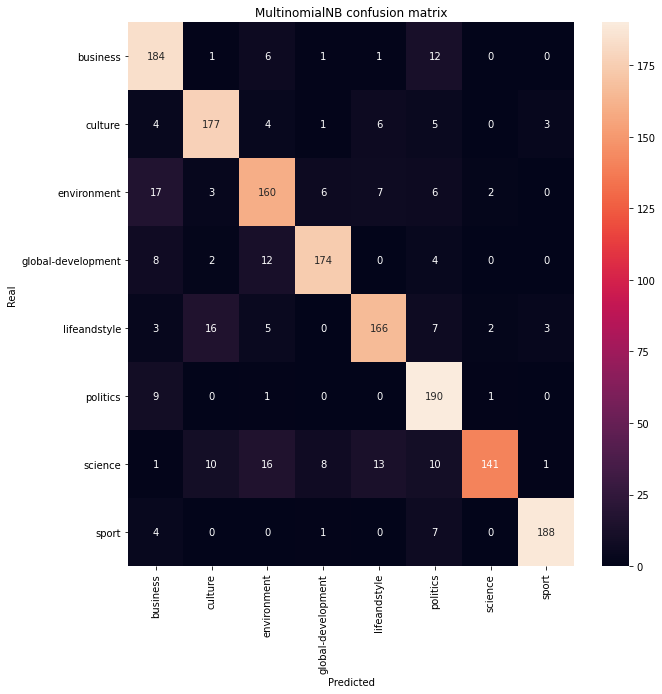

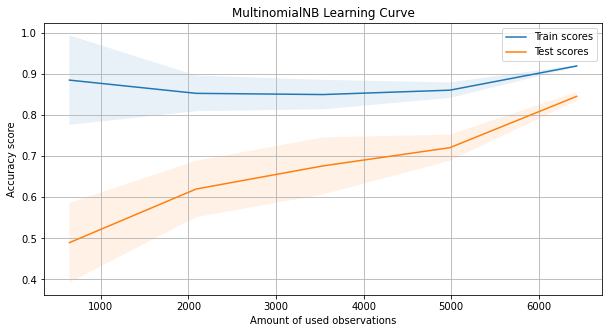

In [13]:
X, y, le = build_features_ml()

ml_alg_eval.plot(
    MultinomialNB(),
    "MultinomialNB",
    X, y, le.classes_
)

## Hyperparameter tuning using TPOT - Genetic algorithm

In [156]:
tpot = TPOTClassifier(generations=3, population_size=5,
    verbosity=2, offspring_size=10,
    scoring='accuracy', cv=5, config_dict='TPOT sparse',
    n_jobs=-1
)

print(tpot.fit(X_train, y_train))
print(tpot.score(X_test, y_test))


Generation 1 - Current best internal CV score: 0.8491929704993468
Generation 2 - Current best internal CV score: 0.9014317115405763
Generation 3 - Current best internal CV score: 0.9031420799694516
Best pipeline: LinearSVC(input_matrix, C=0.5, dual=True, loss=squared_hinge, penalty=l2, tol=0.001)
TPOTClassifier(config_dict='TPOT sparse', crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=3,
               log_file=<ipykernel.iostream.OutStream object at 0x7f1802b18640>,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=-1, offspring_size=10,
               periodic_checkpoint_folder=None, population_size=5,
               random_state=None, scoring='accuracy', subsample=1.0,
               template=None, use_dask=False, verbosity=2, warm_start=False)
0.9105034182722188


LinearSVC classification report
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       205
           1       0.90      0.89      0.89       200
           2       0.78      0.84      0.81       201
           3       0.94      0.91      0.92       200
           4       0.86      0.88      0.87       202
           5       0.92      0.93      0.92       201
           6       0.87      0.85      0.86       200
           7       0.95      0.97      0.96       200

    accuracy                           0.89      1609
   macro avg       0.89      0.89      0.89      1609
weighted avg       0.89      0.89      0.89      1609



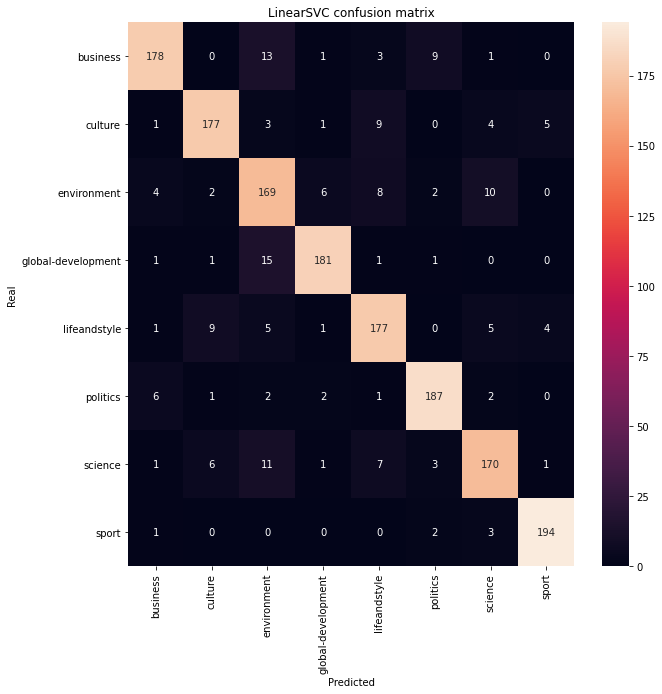

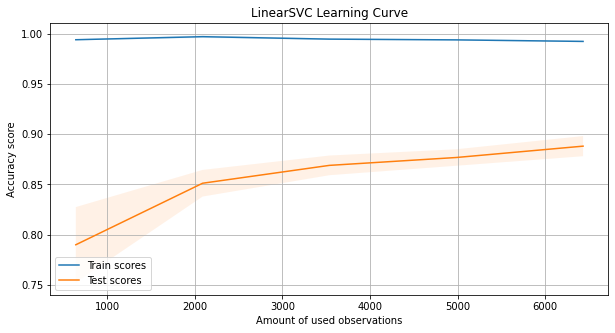

In [20]:
estimator = LinearSVC(C=0.5, dual=True, loss='squared_hinge', penalty='l2', tol=0.001)

ml_alg_eval.plot(
    estimator,
    "LinearSVC",
    X, y, le.classes_
)